# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputcities = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

response

{'coord': {'lon': -73.97, 'lat': 42.6},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 81.3,
  'feels_like': 83.71,
  'temp_min': 79,
  'temp_max': 82.99,
  'pressure': 1011,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 5.93, 'deg': 265},
 'rain': {'1h': 0.25},
 'clouds': {'all': 93},
 'dt': 1595536840,
 'sys': {'type': 3,
  'id': 19530,
  'country': 'US',
  'sunrise': 1595497150,
  'sunset': 1595550315},
 'timezone': -14400,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [5]:
lat = []
lng=[]
temp=[]
maxtemp = []
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]
newcities=[]

record=1
setcounter=1

# Build partial query URL
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print ("Beginning Data Retrieval")     
print ("-----------------------------")
for city in cities:
    if record > 50:
        setcounter +=1
        record = 1
    print (f"Processing Record {record} of Set {setcounter} | {city}")
    record +=1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        newcities.append(city)
        
    except:
        print ("City not found. Skipping...")                        
        pass
    

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sataua
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | makakilo city
Processing Record 5 of Set 1 | kupang
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | hihifo
City not found. Skipping...
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | kiknur
Processing Record 10 of Set 1 | jijiga
Processing Record 11 of Set 1 | selje
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | sergeyevka
Processing Record 19 of Set 1 | oistins
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | coxim
Proc

Processing Record 34 of Set 4 | little current
Processing Record 35 of Set 4 | aksarka
Processing Record 36 of Set 4 | paramithia
City not found. Skipping...
Processing Record 37 of Set 4 | baykit
Processing Record 38 of Set 4 | odienne
Processing Record 39 of Set 4 | koath
Processing Record 40 of Set 4 | grants
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | riyadh
Processing Record 43 of Set 4 | umm lajj
Processing Record 44 of Set 4 | khushab
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | roma
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | mattru
Processing Record 50 of Set 4 | puerto escondido
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | christchurch
Processing Record 4 of Set 5 | buariki
City not found. Skipping...
Processing Record 5 of Set 5 | novomykolayivka
Processing Record 6 of Set 5 |

Processing Record 25 of Set 8 | kahului
Processing Record 26 of Set 8 | mogadishu
Processing Record 27 of Set 8 | kalmunai
Processing Record 28 of Set 8 | itarema
Processing Record 29 of Set 8 | araguaina
Processing Record 30 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 31 of Set 8 | alice springs
Processing Record 32 of Set 8 | whitehorse
Processing Record 33 of Set 8 | san ramon de la nueva oran
Processing Record 34 of Set 8 | kralendijk
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | zhicheng
Processing Record 37 of Set 8 | puerto penasco
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | moerai
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | presidente medici
Processing Record 44 of Set 8 | martapura
Processing Record 45 of Set 8 | mayor pablo lagerenza
Processing Record 46 of Set 8

Processing Record 13 of Set 12 | sahrak
City not found. Skipping...
Processing Record 14 of Set 12 | ballina
Processing Record 15 of Set 12 | evensk
Processing Record 16 of Set 12 | gunnedah
Processing Record 17 of Set 12 | coihaique
Processing Record 18 of Set 12 | lompoc
Processing Record 19 of Set 12 | havelock
Processing Record 20 of Set 12 | reyes
Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | monkey bay
Processing Record 23 of Set 12 | murray bridge
Processing Record 24 of Set 12 | jablah
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | chegdomyn
Processing Record 27 of Set 12 | naruto
Processing Record 28 of Set 12 | kamyshlov
Processing Record 29 of Set 12 | sisimiut
Processing Record 30 of Set 12 | danielskuil
Processing Record 31 of Set 12 | batagay-alyta
Processing Record 32 of Set 12 | kamsack
Processing Record 33 of Set 12 | gualeguay
Processing Record 34 of Set 12 | laguna
Processing Record 35 of Set 12 | griffith


In [6]:
print (maxtemp)

[82.99, 59, 84.2, 70.79, 70, 77.56, 55.13, 61.59, 57.2, 62.29, 39.2, 80.6, 78.8, 39, 71.6, 61.54, 87.8, 39, 38.35, 85.89, 77, 69.39, 75.74, 83.17, 69.8, 82.4, 78.8, 68, 61, 75.2, 84.2, 79, 68.2, 42.42, 39.99, 60.8, 75.56, 37.4, 70.2, 41, 51.8, 44.53, 33.01, 55.99, 74.95, 82.29, 63.52, 73.99, 54.45, 77.52, 60.01, 77.7, 41.4, 47.43, 57.2, 39.99, 66.99, 80.6, 68, 55.99, 43, 48.2, 75.87, 82.4, 63.34, 46, 39, 39.99, 47.17, 77, 75.2, 79.61, 57.2, 68, 51.8, 69.15, 66.97, 70.16, 42.8, 66.76, 93, 59, 63.63, 99, 43, 76.24, 87.01, 51.8, 64.4, 72, 71.6, 59.94, 50, 74.17, 81, 84.88, 64.99, 84.69, 51.06, 64.4, 57.2, 56.82, 79.16, 84.31, 55.4, 81.66, 78.8, 75.79, 48.2, 95, 74.66, 59.22, 65.28, 52.07, 71.6, 73.99, 76.86, 63.37, 75, 50, 81.07, 80.37, 61.36, 79.07, 67.68, 64.2, 75, 70.27, 44.6, 77, 46.99, 53.6, 77, 59, 82.53, 82.4, 57.2, 49.28, 80.6, 65.93, 70, 75.22, 52.39, 75.49, 60.8, 55.4, 66.2, 77.25, 49.37, 53.55, 78.8, 53.6, 50, 55.4, 70.07, 53.6, 80.85, 65.25, 78.8, 42.8, 77.65, 82.49, 78.01, 47

In [7]:

weatherdf=pd.DataFrame({"City":newcities,
              "Latitude":lat,
              'Longitude':lng,
            "Max Temp": maxtemp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             "Wind Speed": windspeed,
             "Country": country,
             "Date": date})
weatherdf

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,82.99,60,93,5.93,US,1595536840
1,hermanus,-34.42,19.23,59.00,84,0,4.00,ZA,1595536841
2,makakilo city,21.35,-158.09,84.20,54,1,11.41,US,1595536675
3,kupang,-10.17,123.58,70.79,79,30,9.91,ID,1595536365
4,hasaki,35.73,140.83,70.00,100,75,2.24,JP,1595536745
...,...,...,...,...,...,...,...,...,...
540,tan an,10.53,106.42,77.00,94,40,3.36,VN,1595536974
541,synya,65.37,58.04,57.94,64,6,4.61,RU,1595536974
542,virginia beach,36.85,-75.98,82.40,78,90,8.05,US,1595536801
543,bonthe,7.53,-12.51,76.33,89,100,11.70,SL,1595536974


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weatherdf.count()

City          545
Latitude      545
Longitude     545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weatherdf.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.234697,16.980330,69.496495,69.689908,50.016514,7.949780,1.595537e+09
std,33.093570,91.688189,14.870571,20.183560,38.622486,5.205343,9.013603e+01
min,-54.800000,-179.170000,24.800000,3.000000,0.000000,0.310000,1.595536e+09
25%,-8.140000,-63.760000,58.660000,57.000000,5.000000,4.030000,1.595537e+09
50%,22.290000,22.200000,72.370000,74.000000,52.000000,6.890000,1.595537e+09
75%,45.980000,96.150000,80.580000,85.000000,90.000000,10.600000,1.595537e+09
max,78.220000,179.320000,102.990000,100.000000,100.000000,30.000000,1.595537e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


weatherdf.to_csv("weather.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

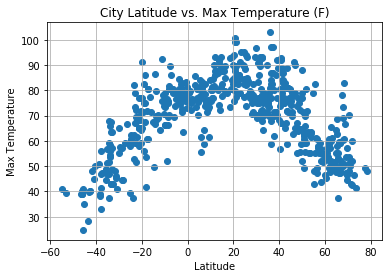

In [13]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.title('City Latitude vs. Max Temperature (F)')
plt.show()



## Latitude vs. Humidity Plot

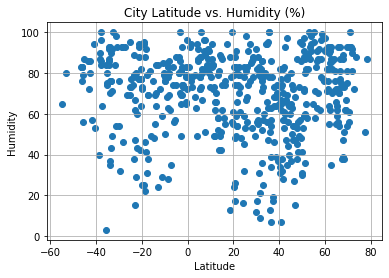

In [14]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

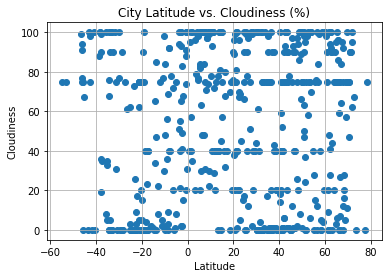

In [15]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (%)')
plt.grid()
plt.show()

plt.show()

## Latitude vs. Wind Speed Plot

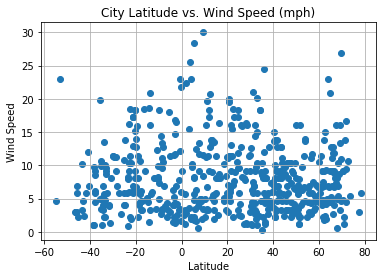

In [16]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [17]:
# # Define function for creating linear agression and scatter plot
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # plt.scatter(x_values,y_values)
# # plt.plot(x_values,regress_values,"r-")
# # plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
nhem = weatherdf.loc[weatherdf["Latitude"] >= 0]
shem = weatherdf.loc[weatherdf["Latitude"] < 0]
nhem
shem

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hermanus,-34.42,19.23,59.00,84,0,4.00,ZA,1595536841
3,kupang,-10.17,123.58,70.79,79,30,9.91,ID,1595536365
5,faanui,-16.48,-151.75,77.56,81,1,18.50,PF,1595536545
9,castro,-24.79,-50.01,62.29,73,0,3.98,BR,1595536545
10,punta arenas,-53.15,-70.92,39.20,80,75,23.04,CL,1595536463
...,...,...,...,...,...,...,...,...,...
518,monkey bay,-14.07,34.92,66.81,69,65,18.63,MW,1595536969
519,murray bridge,-35.12,139.27,46.99,80,35,9.91,AU,1595536969
526,danielskuil,-28.19,23.54,44.42,46,0,6.93,ZA,1595536971
529,gualeguay,-33.14,-59.31,49.06,92,100,9.15,AR,1595536972


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

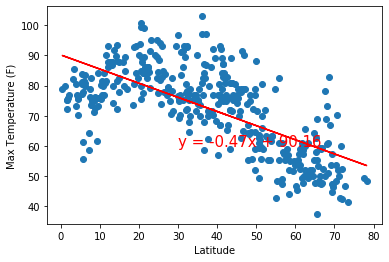

The r-squared is: 0.46627564814700206


In [20]:

x_values = nhem['Latitude']
y_values = nhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

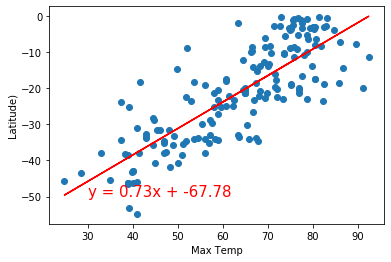

The r-squared is: 0.6611742904610819


In [21]:
x_values = shem['Max Temp']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

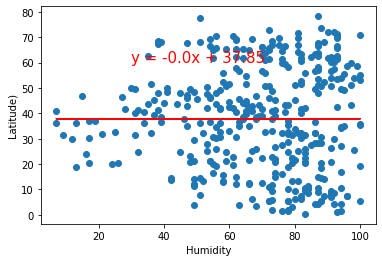

The r-squared is: 1.8838278718797058e-10


In [22]:
x_values = nhem['Humidity']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

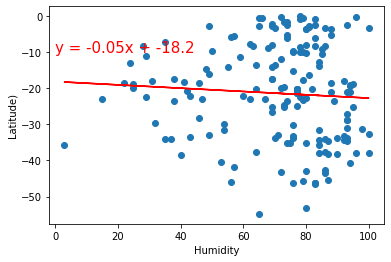

The r-squared is: 0.0042950324991752635


In [23]:
x_values = shem['Humidity']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

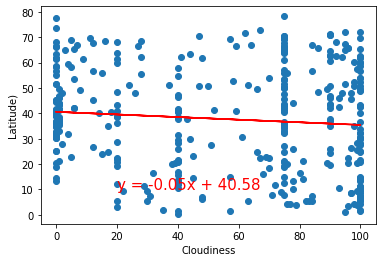

The r-squared is: 0.00948953771990082


In [24]:
x_values = nhem['Cloudiness']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

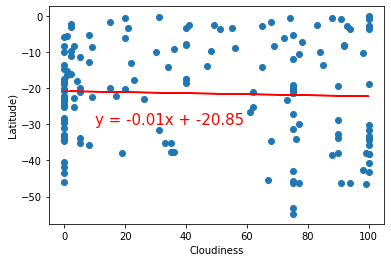

The r-squared is: 0.0016545894086446807


In [25]:
x_values = shem['Cloudiness']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

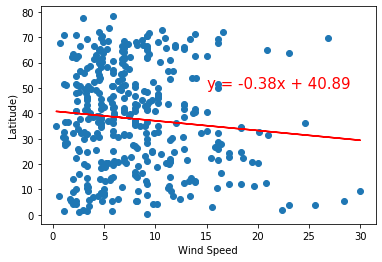

The r-squared is: 0.009740000260027134


In [26]:
x_values = nhem['Wind Speed']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

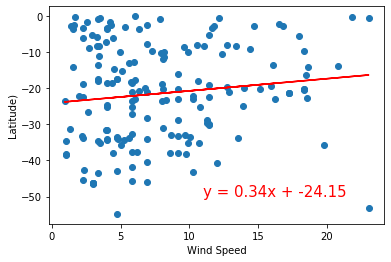

The r-squared is: 0.016862744801208963


In [27]:
x_values = shem['Wind Speed']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(11,-50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")